# **song popularity prediction**

The dataset include all the songs that have been on the Top 200 Weekly (Global charts of Spotify in 2020 & 2021)

The dataset include the following features:                         
**Highest Charting Position:** The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Number of Times Charted:** The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Week of Highest Charting:** The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Song Name:** Name of the song that has been on in the Spotify Top 200  Weekly    Global Charts in 2020 & 2021.
**Song iD:** The song ID provided by Spotify (unique to each song).
**Streams:** Approximate number of streams the song has.
**Artist:** The main artist/ artists involved in making the song.
**Artist Followers:** The number of followers the main artist has on Spotify.
**Genre:** The genres the song belongs to.
**Release Date:** The initial date that the song was released.
**Weeks Charted:** The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
**Popularity:**The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
**Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
**Acousticness:** A measure from 0.0 to 1.0 of whether the track is acoustic.
**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
**Instrumentalness:** Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
**Chord:** The main chord of the song instrumental.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import joblib

**Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/spotify_dataset.csv')  
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
data.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [5]:
data = data.drop(['Index','Week of Highest Charting','Song Name','Streams','Song ID','Weeks Charted'],axis=1)
data.head()

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


# Data exploring

In [6]:
Artist=data['Artist'].value_counts()
Artist=pd.DataFrame(Artist)
Artist

,Artist
Taylor Swift,52
Lil Uzi Vert,32
Justin Bieber,32
Juice WRLD,30
Pop Smoke,29
...,...
"Chris Brown, Young Thug",1
"Rauw Alejandro, J Balvin",1
347aidan,1
"Migrantes, Alico",1


In [7]:
Artist.size

716

In [8]:
Genre=data['Genre'].value_counts()
Genre=pd.DataFrame(Genre)
Genre

,Genre
[],75
"['dance pop', 'pop', 'post-teen pop']",71
"['latin', 'reggaeton', 'trap latino']",63
"['pop', 'post-teen pop']",57
"['melodic rap', 'philly rap', 'rap', 'trap']",33
...,...
['trap queen'],1
"['dream smp', 'viral rap']",1
"['disco', 'europop', 'new romantic', 'new wave', 'new wave pop', 'soft rock', 'synthpop']",1
"['adult standards', 'brill building pop', 'easy listening', 'lounge', 'rockabilly', 'vocal jazz']",1


In [9]:
Genre.size

395

In [10]:
Chord=data['Chord'].value_counts()
Chord=pd.DataFrame(Chord)
Chord

,Chord
C#/Db,214
C,155
B,141
G,136
F,131
G#/Ab,130
D,125
A#/Bb,122
F#/Gb,121
A,118


In [11]:
Chord.size

13

In [12]:
# print(data['Artist'].unique())
# print('************')
# print(data['Genre'].unique())
# print('************')
# print(data['Chord'].unique())

**PREPROCESSING**

In [13]:
data.head(1)

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


extracting month from date

In [14]:
data['Release Date']=pd.to_datetime(data['Release Date'],infer_datetime_format=True,errors='coerce')
data['month']=data['Release Date'].dt.month

data=data.drop('Release Date',axis=1)
data.head(1)

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,1,8,Måneskin,3377762,"['indie rock italiano', 'italian pop']",100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,12.0


In [15]:
data.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Artist                        object
Artist Followers              object
Genre                         object
Popularity                    object
Danceability                  object
Energy                        object
Loudness                      object
Speechiness                   object
Acousticness                  object
Liveness                      object
Tempo                         object
Duration (ms)                 object
Valence                       object
Chord                         object
month                        float64
dtype: object

converting object to float

In [16]:
#to_numeric  --to convert to numeric form or float
#errors='coerce'--to convert non numerical values to nan values
data['Artist Followers']=pd.to_numeric(data['Artist Followers'],errors='coerce')
data['Popularity']=pd.to_numeric(data['Popularity'],errors='coerce')
data['Danceability']=pd.to_numeric(data['Danceability'],errors='coerce')
data['Energy']=pd.to_numeric(data['Energy'],errors='coerce')
data['Loudness']=pd.to_numeric(data['Loudness'],errors='coerce')
data['Speechiness']=pd.to_numeric(data['Speechiness'],errors='coerce')
data['Acousticness']=pd.to_numeric(data['Acousticness'],errors='coerce')
data['Liveness']=pd.to_numeric(data['Liveness'],errors='coerce')
data['Tempo']=pd.to_numeric(data['Tempo'],errors='coerce')
data['Duration (ms)']=pd.to_numeric(data['Duration (ms)'],errors='coerce')
data['Valence']=pd.to_numeric(data['Valence'],errors='coerce')

In [17]:
data.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Artist                        0
Artist Followers             11
Genre                         0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                         0
month                        11
dtype: int64

droping null values

In [18]:
data=data.dropna()
data.isnull().sum()

Highest Charting Position    0
Number of Times Charted      0
Artist                       0
Artist Followers             0
Genre                        0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
month                        0
dtype: int64

or, mean value can be also taken to fill nan values

In [19]:
# data['Artist Followers']=data['Artist Followers'].fillna(data['Artist Followers'].mean)
# data['Popularity']=data['Popularity'].fillna(data['Popularity'].mean)

Label encoding

In [20]:
le_Artist =LabelEncoder()
le_Genre =LabelEncoder()
le_Chord =LabelEncoder()

    
data['Artist'] =le_Artist.fit_transform(data['Artist'])
data['Genre'] =le_Genre.fit_transform(data['Genre'])  
data['Chord'] =le_Chord.fit_transform(data['Chord'])

data.head()

,Highest Charting Position,Number of Times Charted,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,month
0,1,8,469,3377762.0,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,2,12.0
1,2,3,643,2230022.0,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,4,7.0
2,1,11,500,6266514.0,364,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,0,5.0
3,3,5,203,83293380.0,363,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,2,6.0
4,5,1,381,5473565.0,312,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,6,7.0


In [23]:
le_Genre.transform(["['pop', 'uk pop']"])
#le_Artist.transform(['Jorge & Mateus'])

array([363])

**X, Y splitting**

In [31]:
x=data.drop('Popularity',axis=1)
y=data['Popularity']

**Scaling**

In [32]:
scaler =MinMaxScaler()
x=scaler.fit_transform(x)


In [33]:
scaler.transform([x[3]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[-4.97462185e-03, -6.89100146e-03, -5.85843110e-05,
         2.35029039e-03,  9.45748556e-01,  9.73581018e-01,
         4.74188769e-02, -5.40005662e-02,  5.89530212e-01,
        -4.95867769e-02]])

**visualization**

<Axes: title={'center': 'Top in Artist Followers'}, xlabel='Popularity', ylabel='Artist Followers'>

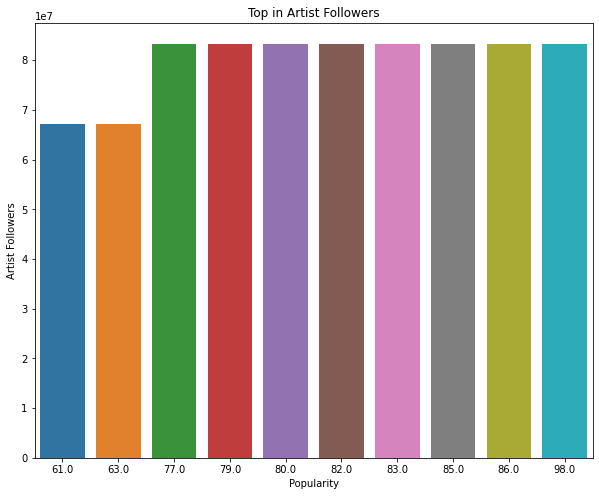

In [ ]:
sort=data.sort_values(by=['Artist Followers'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Artist Followers')
sns.barplot(x='Popularity',y='Artist Followers',data=sort.head(10))

<Axes: title={'center': 'Top in Energy'}, xlabel='Popularity', ylabel='Energy'>

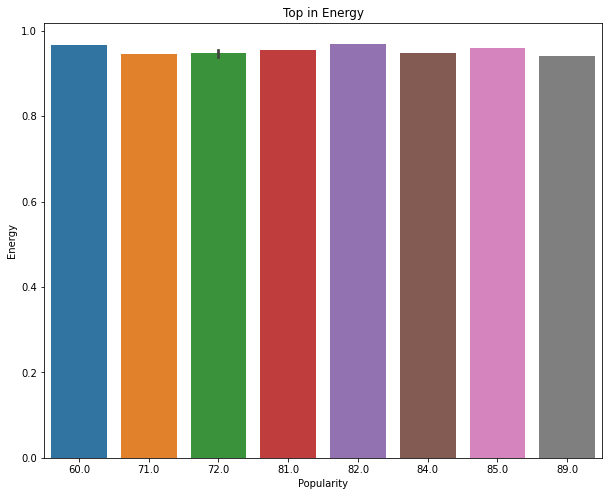

In [ ]:
sort=data.sort_values(by=['Energy'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Energy')
sns.barplot(x='Popularity',y='Energy',data=sort.head(10))

<Axes: title={'center': 'Top in Loudness'}, xlabel='Popularity', ylabel='Loudness'>

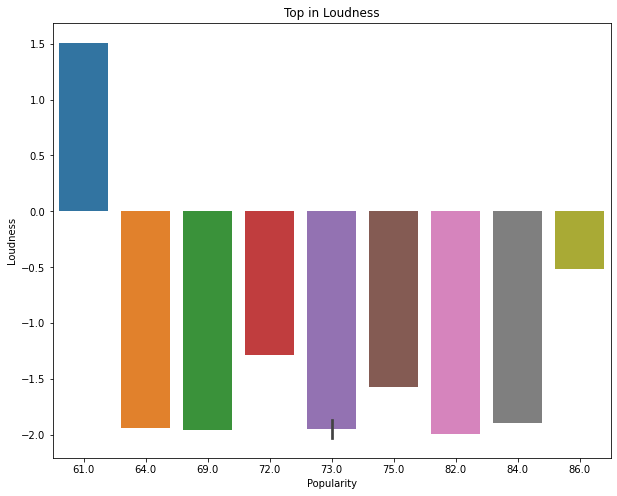

In [ ]:
sort=data.sort_values(by=['Loudness'],ascending=False)
plt.figure(figsize=[10,8])
plt.title('Top in Loudness')
sns.barplot(x='Popularity',y='Loudness',data=sort.head(10))

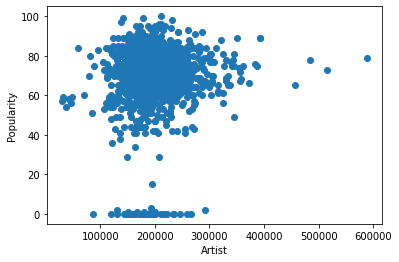

In [ ]:
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.scatter(data['Duration (ms)'],data['Popularity'])

**Correlation**

<Axes: >

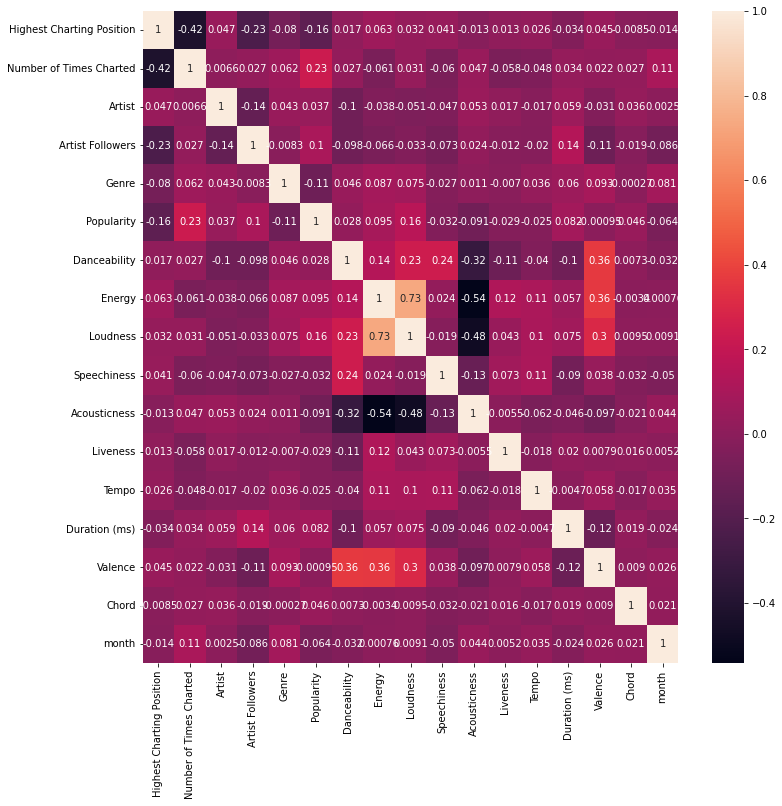

In [ ]:
c=data.corr()
plt.figure(figsize=[12,12])
sns.heatmap(c,annot=True)

In [ ]:
print(data['Highest Charting Position'].corr(data['Popularity']))
print(data['Number of Times Charted'].corr(data['Popularity']))
print(data['Artist'].corr(data['Popularity']))
print(data['Artist Followers'].corr(data['Popularity']))

print('*************')
print(data['Genre'].corr(data['Popularity']))
print(data['Danceability'].corr(data['Popularity']))
print(data['Energy'].corr(data['Popularity']))
print(data['Loudness'].corr(data['Popularity']))

print('**************')
print(data['Speechiness'].corr(data['Popularity']))
print(data['Acousticness'].corr(data['Popularity']))
print(data['Liveness'].corr(data['Popularity']))
print(data['Tempo'].corr(data['Popularity']))

print('**************')
print(data['Duration (ms)'].corr(data['Popularity']))
print(data['Valence'].corr(data['Popularity']))
print(data['Chord'].corr(data['Popularity']))
print(data['month'].corr(data['Popularity']))

-0.1641673405163627
0.23279557540838783
0.03732347786491109
0.1043577212316507
*************
-0.1075888717018958
0.02843469181752918
0.09469051758444463
0.15876746803181324
**************
-0.03209063359152795
-0.09124461072497646
-0.029459634726915384
-0.02495087653404513
**************
0.08209572542261853
-0.0009533924114401778
0.045787615126558615
-0.06380392190329007


feature selection based on correlation

< 0.00

In [29]:
data =data.drop(['Chord'],axis=1)

< 0.05

In [30]:
data =data.drop(['Artist','Danceability','Speechiness','Liveness','Tempo'],axis=1)

In [ ]:
data.head(2)

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Energy,Loudness,Acousticness,Duration (ms),Valence,month
0,1,8,3377762.0,276,100.0,0.800,-4.808,0.1270,211560.0,0.589,12.0
1,2,3,2230022.0,63,99.0,0.764,-5.484,0.0383,141806.0,0.478,7.0


**Hyperparameter tuning**

In [ ]:
model_params={'AdaBoostRegressor':{'model':AdaBoostRegressor(),'params':{}},
              'GradientBoostingRegressor':{'model':GradientBoostingRegressor(),'params':{}},
              'XGBRFRegressor':{'model':XGBRFRegressor(),'params':{}}}

In [ ]:
scores = []
models = ['AdaBoostRegressor','GradientBoostingRegressor','XGBRFRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [ ]:
scores

[{'model': 'AdaBoostRegressor',
  'best_score': 0.4630051397597816,
  'best_params': {}},
 {'model': 'GradientBoostingRegressor',
  'best_score': 0.5419171240184151,
  'best_params': {}},
 {'model': 'XGBRFRegressor',
  'best_score': 0.5254204123064793,
  'best_params': {}}]

other models

In [ ]:
model_params = {'DecisionTreeRegressor':{'model':DecisionTreeRegressor(),'params':{'max_depth':[3,4,5,6]}},
               'RandomForestRegressor':{'model':RandomForestRegressor(),'params':{'n_estimators':[5,10,15,20],'max_depth':[3,4,5,6,7]}}}
                                                                             
                                                      
        

In [ ]:
scores = []
models = ['DecisionTreeRegressor','RandomForestRegressor']
for model_name in models:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name, 'best_score':gds.best_score_ , 'best_params':gds.best_params_})

In [ ]:
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': 0.5331107096675873,
  'best_params': {'max_depth': 4}},
 {'model': 'RandomForestRegressor',
  'best_score': 0.5584104291500352,
  'best_params': {'max_depth': 4, 'n_estimators': 20}}]

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

**model training**

In [ ]:
GRDBOOST=GradientBoostingRegressor()
GRDBOOST_model=GRDBOOST.fit(x_train,y_train)
GRDBOOST_model.score(x_test,y_test)

0.8064106661300737

In [ ]:
XGBR=XGBRFRegressor()
xgb_model=XGBR.fit(x_train,y_train)
xgb_model.score(x_test,y_test)

0.7853089899857811

In [ ]:
DTREE=DecisionTreeRegressor(max_depth=4,random_state=10,)
DTREE_model=DTREE.fit(x_train,y_train)
DTREE_model.score(x_test,y_test)

0.7814491823034527

In [ ]:
RandomForest=RandomForestRegressor(n_estimators=8,random_state=10,)
model=RandomForest.fit(x_train,y_train)
model.score(x_test,y_test)

0.7618021316791135

**Predicting**

In [ ]:
GRDBOOST_model.predict([x_test[0]])

array([76.09957474])

In [ ]:
x_test[0]

array([0.69346734, 0.04964539, 0.07310049, 0.92875318, 0.72707424,
       0.77645736, 0.20722312, 0.42492195, 0.78986272, 0.18181818])

**predicting with orginal data (data which is not preprocessed)**

In [ ]:
import numpy as np
gener=le_Genre.transform(["['pop', 'uk pop']"])
values=scaler.transform([[5,1,5473565.0,gener[0],0.736,-7.409,0.0615,212000.0, 0.0203,5]])
result=GRDBOOST_model.predict(values)
result

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([78.83966])

**saving the model**

In [ ]:
import joblib
joblib.dump(GRDBOOST_model,'pop1_model')

['pop1_model']

**Recalling the model**

In [ ]:
joblib_reloaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop1_model') 
joblib_reloaded.predict([x_test[0]])

array([76.09957474])

In [ ]:
x_test[0]

array([0.69346734, 0.04964539, 0.07310049, 0.92875318, 0.72707424,
       0.77645736, 0.20722312, 0.42492195, 0.78986272, 0.18181818])

**function for prediction**

In [ ]:
def prediction(values):
  joblib_reloaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop1_model') 
  result=joblib_reloaded.predict(values)
  result=result[0]
  print('The popularity of the song is {} % ' .format(result))

In [ ]:
valuse=0.69346734, 0.04964539, 0.07310049, 0.92875318, 0.72707424, 0.77645736, 0.20722312, 0.42492195, 0.78986272, 0.18181818
prediction(values)

The popularity of the song is 78.83965999660654 % 


**function for predicting from saved model(for non-preprocessed data)**

In [34]:
def pred(Position, Times_Charted, Followers,	Genre, Energy, Loudness, Acousticness, Duration, Valence,	month):
  gener=le_Genre.transform([Genre])
  values=scaler.transform([[Position,Times_Charted,Followers,gener[0],Energy,Loudness,Acousticness,Duration,Valence,month]])
  joblib_reloaded = joblib.load('/content/drive/MyDrive/Colab Notebooks/project/ML/song popularity and streams prediction/pop1_model') 
  result=joblib_reloaded.predict(values)
  result=result[0]
  print('The popularity of the song is {} % ' .format(result))

In [37]:
pred(2,3,3377762.0, "['pop', 'uk pop']",0.8,-4.808, 0.127, 211560.0, 0.589, 12)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


The popularity of the song is 77.63854427729336 % 


saving and recalling using pickle

In [ ]:
import pickle
with open ('reg_pickle','wb') as f:
    pickle.dump(xgb_model,f)

In [ ]:
with open ('reg_pickle','rb') as s:
    reg_loaded=pickle.load(s)